# IMAC2 : TP de filtrage no 1 

## But du travail 

>- Il s'agit de filtrer passe-bas un signal audio; il faudra ensuite apprécier l'effet de ce filtrage d'abord acoustiquement, ensuite mathématiquement (comparaison des spectres avant et après filtrage). 


## Mise en oeuvre

>- Le filtre passe-bas utilisé est un filtre RIF obtenu par la méthode de fenêtrage du filtre passe-bas idéal. 

>- Il faudra comparer les gains de filtres obtenus grâce à différentes fenêtres.



## Méthode de la fenêtre 

Le filtre passe-bas idéal admet comme fonction de transfert 
$$
H_{\text{ideal}}(\nu)=\mathbb{I}_{[-\nu_c,\nu_c]}(\nu)
$$
où $0<\nu_c<\frac{1}{2}$ est la fréquence de coupure du filtre.
La réponse impusionnelle du filtre est calculée par TF inverse et on trouve : 
\begin{equation}
\begin{cases}
h_{\text{ideal}}[0] & =2\nu_{c}\\
h_{\text{ideal}}[n] & =\frac{\sin(2\pi n\nu_{c})}{\pi n}\ \text{si }n\neq0
\end{cases}
\end{equation}

On se donne un entier $N$ pair auquel on associe une fenêtre $w_N[n]$ : celle-ci est un ensemble de $N+1$ poids positifs, symétriques autour de l'indice $\frac{N}{2}$. Exemples (pour $N=4$) : 
>- la fenêtre rectangulaire $w_4^{\text rect}=(1 \ , \ 1 \ , \ 1 \ ,\  1 \  , \  1 )$
>- la fenêtre triangulaire (appelée aussi fenêtre de Bartlett) : 
$w_4^{\text tri}=\frac{1}{3}(1 \ , \ 2 \ , \ 3 \ ,\  2 \  , \  1 )$


La méthode de la fenêtre consiste donc à définir le filtre RIF d'ordre $N$ dont la réponse impulsionnelle est 
\begin{equation}  
\forall n\in\{0,1,...,N\}\ \ h[n]=h_{\text{ideal}}[n-\frac{N}{2}] . w_N[n]
\end{equation}


## Premier travail

>- Choisissez $N=50$

>- Générez trois vecteurs de $N+1$ composantes  $w_1,w_2,w_3$ correspondant respectivement aux fenêtres rectangulaire, Bartlett et Hamming. 

>- Dans une même figure, représentez ces fenêtres 

Aide : pour Hamming , utilisez $\texttt{signal.hamming(N+1)}$. Pour la fenêtre de Bartlett, remarquez que ses valeurs sont données par 
$$
\forall n\in\left\{-\frac{N}{2},...,\frac{N}{2}\right\} \ \ w_N^{\text{tri}}[n]=N+\frac{2(1-N) }{N}|n|
$$


## Deuxième travail 

>- Calculez les vecteurs $h_1,h_2,h_3$ correspondant aux réponses impulsionnelles associées aux trois fenêtres définies plus haut. 

>- Dans une même fenêtre divisée en trois graphiques, représentez le gain en décibels de chacun des trois filtres obtenus.  La syntaxe de la fonction permettant de calculer la TF de $h_1$ par exemple est 
 
```
omega , H1 = signal.freqz(h1)

```
(remarque : dans l'exmple précédents, le vecteur des  fréquences se déduit ainsi $\texttt{nu = omega/(2*np.pi)$) 

>- Comparez qualitativement les filtres obtenus en mesurant *grosso modo*  l'oscillation max. (en dB) en bande passante, en bande de coupure, la largeur de la bande de transition  




## Troisième travail 

>- importez le fichier $\texttt{la_vibrato.wav}$ dans l'environnement Python 

>- Choisissez le filtre passe-bas idéal tronqué grâce à la fenêtre de Hamming. 

>- Filtrez ce signal en choisissant une fréquence de coupure 
$$
\nu_c= \frac{3f_0}{2F_e}
$$
où $f_0=440$Hz est la fréquence du son, $F_e$ la fréquence d'échantillonnage. 

Si $h$ est le vecteur de la RI, et $x$ le signal à filtrer, on utilisera la syntaxe
$$y=\texttt{signal.convolve(h,x)}$$

>- Ecoutez le résultat obtenu. 

>- Dans une même fenêtre, visualisez les périodogrammes du signal d'origine et du signal filtré et comparez. 
     

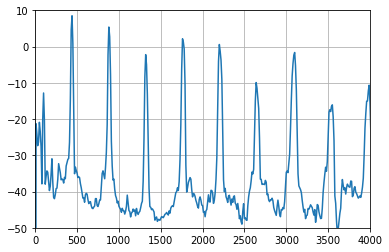

In [14]:
from scipy import signal
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile as io

def enregistrer_son(nom_fichier,signal,Fs):
    y=0.5*normaliser_son_mono(signal.x)  ### le facteur 0.5 pour éviter d'exploser les oreilles...
    scaled = np.round(32767*y)   ### passage en 16 bits
    newdata = scaled.astype(np.int16)   ### conversion en type int
    io.write(nom_fichier, Fs, newdata)   ### codage en wav

    
### A effectuer avant d'enregistrer : 
def normaliser_son_mono(x):
    M = np.max(abs(x)); ## la plus grande valeur absolue du signal
    return  x/M;      


class periodogramme:
    pass
## on conviendra que les champs d'un periodogramme (appelons-le S) sont : 
##  S.val  : les valeurs du spectre 
##  S.nu : le vecteur des fréquences normalisées 
##  S.Fe : la frequence d'echantillonnage en Hz
## EXEMPLE D'APPLICATION :  plt.plot((S.nu)*XS.Fs,S.val)

def creer_periodogramme(valeurs,nu,Fs):
    S=periodogramme()
    S.val=valeurs
    S.nu = nu
    S.Fe = Fs
    return(S)


def calcul_periodogramme(x,Fe):
    ### périodogramme moyenné. Sections de 0.1 seconde
    N=len(x)
    N1=int(np.floor(0.1*Fe))
    K=int(np.floor(N/N1))
    w=signal.hamming(N1)
    ind1 = 0
    ind2 = N1-1
    b = w*x[ind1:(ind2+1)] 
    f, B = signal.periodogram(b, Fe)
    B=B/N1
    while ind2+N1<N:
        ind1=ind1+N1
        ind2=ind2+N1
        b=w*x[ind1:(ind2+1)]
        f, aux = signal.periodogram(b, Fe)
        B=B+aux/N1
    B=B/K
    B=10*np.log10(B)
    return(f,B)
########### fin de la fonction 


    

### le son à filtrer : 
rate, data = io.read('la_vibrato.wav')   
## L'enregistrement est stereo comme le montre le code suivant :
data.shape
## conversion du signal en mono
x=data[:,0]+data[:,1]   

### Le périodogramme du signal avant filtrage 
# f est un tableau des frequences echantillonee
# B est un tableau de la puissance correspondant a chacune des fréquences
f , B = calcul_periodogramme(x,rate)
plt.plot(f,B)
plt.axis([0,4000 , -50,10])
plt.grid()
plt.show()


___

# 1 Début du TP Filtrage

## 1.1 Premier travail

Isolez les coefficients

>- Choisissez $N=50$

>- Générez trois vecteurs de $N+1$ composantes  $w_1,w_2,w_3$ correspondant respectivement aux fenêtres rectangulaire, Bartlett et Hamming. 

>- Dans une même figure, représentez ces fenêtres 

Aide : pour Hamming , utilisez $\texttt{signal.hamming(N+1)}$. Pour la fenêtre de Bartlett, remarquez que ses valeurs sont données par 
$$
\forall n\in\left\{-\frac{N}{2},...,\frac{N}{2}\right\} \ \ w_N^{\text{tri}}[n]=N+\frac{2(1-N) }{N}|n|
$$


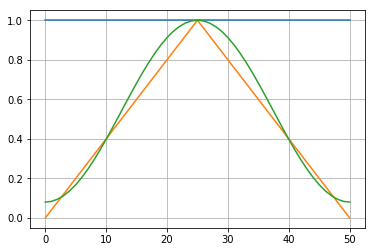

In [34]:
N = 50
x = signal.hamming(N + 1)

w1 = signal.windows.boxcar(N + 1)
w2 = signal.windows.bartlett(N + 1)
w3 = signal.windows.hamming(N + 1)

plt.plot(w1)
plt.plot(w2)
plt.plot(w3)
plt.grid()
plt.show()

## 1.2 Deuxième travail

>- Calculez les vecteurs $h_1,h_2,h_3$ correspondant aux réponses impulsionnelles associées aux trois fenêtres définies plus haut.

La réponse impusionnelle du filtre est calculée par TF inverse et on trouve : 
\begin{equation}
\begin{cases}
h_{\text{ideal}}[0] & =2\nu_{c}\\
h_{\text{ideal}}[n] & =\frac{\sin(2\pi n\nu_{c})}{\pi n}\ \text{si }n\neq0
\end{cases}
\end{equation}

>- Dans une même fenêtre divisée en trois graphiques, représentez le gain en décibels de chacun des trois filtres obtenus.  La syntaxe de la fonction permettant de calculer la TF de $h_1$ par exemple est 
 
```
omega , H1 = signal.freqz(h1)

```
(remarque : dans l'exmple précédents, le vecteur des  fréquences se déduit ainsi $\texttt{nu = omega/(2*np.pi)$) 

>- Comparez qualitativement les filtres obtenus en mesurant *grosso modo*  l'oscillation max. (en dB) en bande passante, en bande de coupure, la largeur de la bande de transition  

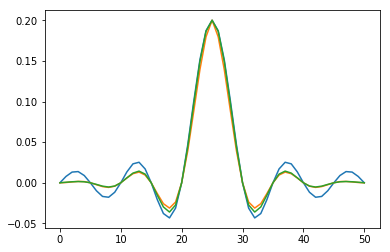

In [75]:
nuC = 0.1
        
hIdeal = [np.sin(2 * np.pi * n * nuC) / (np.pi * n) if n != 0 else 2 * nuC for n in range (int(-N / 2), int(N / 2) + 1)]

h1 = hIdeal * w1
h2 = hIdeal * w2
h3 = hIdeal * w3

plt.plot(h1)
plt.plot(h2)
plt.plot(h3)